In [9]:
import pandas as pd
pd.set_option('display.width', 200)
df_mergedUS = pd.read_csv('df_mergedUS.csv')
df_mergedUK = pd.read_csv('df_mergedUK.csv')

In [10]:
df_mergedUS.head()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,4.562353,1.305474,8.910000,5.466667
1,4.847178,0.584260,9.100000,5.466667
2,4.346052,1.323657,8.956667,5.333333
3,4.518577,1.011264,9.206667,5.200000
4,6.414052,0.760203,8.773333,5.233333


In [11]:
df_mergedUS.corr()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
Annual Inflation Rate,1.000000,0.295871,0.239073,-0.244145
Quarterly GDP Change,0.295871,1.000000,0.083922,-0.215855
Interest Rate Quarterly,0.239073,0.083922,1.000000,-0.123764
Unemployment Rate Quarterly,-0.244145,-0.215855,-0.123764,1.000000


In [12]:
df_mergedUK.head()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,7.614098,2.480186,8.88,8.7
1,3.219333,3.007100,11.88,8.4
2,4.516820,2.917238,12.88,8.0
3,4.205032,2.489297,12.88,7.6
4,8.791563,1.760053,13.75,7.2


In [13]:
df_mergedUK.corr()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
Annual Inflation Rate,1.000000,0.171440,0.253415,0.068180
Quarterly GDP Change,0.171440,1.000000,0.167079,0.046167
Interest Rate Quarterly,0.253415,0.167079,1.000000,0.375955
Unemployment Rate Quarterly,0.068180,0.046167,0.375955,1.000000


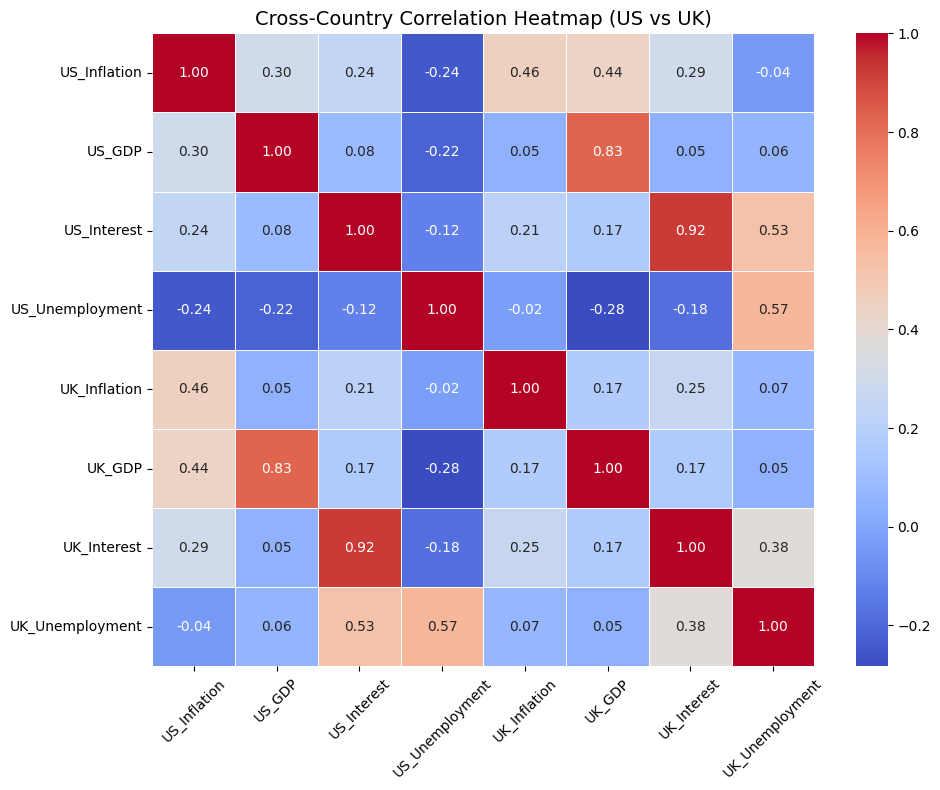

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size based on number of variables
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(cross_country_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Cross-Country Correlation Heatmap (US vs UK)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
